In [1]:
using MatrixProductBP
using JLD2, UnPack, Statistics
import Measurements: value
using Plots, ColorSchemes
using LaTeXStrings;

In [2]:
pgfplotsx();

┌ Warning: backend `PGFPlotsX` is not installed.
└ @ Plots /home/stecrotti/.julia/packages/Plots/Hxe7H/src/backends.jl:37


In [2]:
sz = (400,300)

Plots.default(
    grid = :off, box = :on,
    legend = :topright,
    widen = true,
    label = "",
    lw = 1.5,
    msc = :auto,
    size = sz,
    markersize = 2
)

In [3]:
myblue = theme_palette(:auto)[1];

In [4]:
plot_autocovs(args...; kw...) = plot_autocovs!(plot(), args...; kw...)
function plot_autocovs!(pl, c; skip_even=false, T=size(c,1)-1, us=0:(2*floor(Int, T/10)):T, kw...)
    step = skip_even ? 2 : 1
    cg = cgrad(:matter, length(us)+1, categorical=true)
    ylabel = L"\langle x_{i}^t x_{i}^{t+\Delta t}\rangle-" * 
        L"\langle x_{i}^t\rangle\langle x_{i}^{t+\Delta t}\rangle"
    xlabel = L"\Delta t"
    plot!(pl; xlabel, ylabel, legend=:outertopright)
     
    for (j,u) in enumerate(us)
        plot!(pl, u:-step:1, c[(0:step:u-1) .+ 1,u+1], label="t+Δt=$u", c=cg[j+1], msc=:auto; kw...) 
    end
    pl
end 

plot_autocovs! (generic function with 1 method)

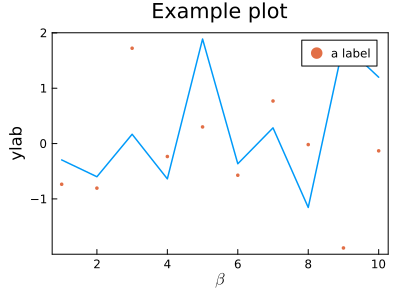

In [5]:
plot(randn(10), xlabel=L"\beta", ylabel="ylab", title="Example plot", size=(400,300))
scatter!(randn(10), label="a label")

## Glauber uniform J, Erdos-Renyi

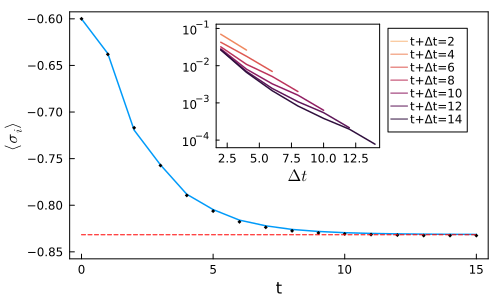

In [6]:
fn = "glauber_erdos_renyi"
data = load("plot_data/"*fn*".jld2")
@unpack T, m_mc, m_avg, m_std, m_eq, c_avg, c_std = data

resize_factor = 1.0

pl = plot(ylims=(-0.85,-0.6), size=resize_factor.*(500,300), xlabel="t", ylabel=L"\langle\sigma_i\rangle", 
    legend=false)
plot!(pl, 0:T, m_avg, c=myblue, label="MPBP")
plot!(pl, 0:T, mean(m_mc), label="sample mean", c=:black, m=:diamond, ms=2, msc=:auto, st=:scatter)
plot!(pl, [0,T], [-m_eq.val, -m_eq.val], label="equilibrium", c=:red, ls=:dash, lw=1)

ci = map(x -> x > 1e-16 ? x : NaN, c_avg)
skip_even = true

plot!(pl, inset=(1, bbox(0.35, 0.05, 0.6, 0.5)), subplot=2)
pl_autocov = plot_autocovs!(pl[2], ci; us=2:2:T, skip_even, yaxis=:log10, legend=:outertopright)
plot!(pl[2], ylabel="", yticks=10.0.^(-4:1:-1))
pl

In [7]:
# savefig(pl, "plot_outputs/"*fn*".pdf");

## Glauber uniform J on infinite 8-regular graph

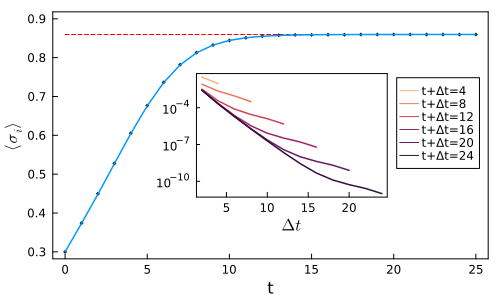

In [8]:
fn = "glauber_infinite8RRG_smallbeta"
data = load("plot_data/"*fn*".jld2")
@unpack T, k, m_mc, m, m_eq, c = data

resize_factor = 1.0

pl = plot([0,T], [m_eq, m_eq], c=:red, ls=:dash, lw=1, label="equilibrium", ylims=(0.3,0.9),
    size=resize_factor.*(500,300))
# plot!(pl, 0:T, sample(m_mc, 10^2), label=permutedims(["samples"; fill("", 10^2-1)]), c=:gray, 
#     lw=0.2, la=0.5)
plot!(pl, 0:T, mean(m_mc), label="sample mean", c=:black, m=:diamond, ms=2, msc=:auto, 
    st=:scatter)
pl = plot!(pl, 0:T, m, xlabel="t", ylabel=L"\langle\sigma_i\rangle", label="MPBP",
    xticks=0:5:T, ms=3, c=myblue, legend=false)

ci = map(x -> x > 1e-16 ? x : NaN, c)
skip_even = true

plot!(pl, inset=(1, bbox(0.33, 0.25, 0.65, 0.5)), subplot=2)
pl_autocov = plot_autocovs!(pl[2], ci; us=4:4:T, skip_even, yaxis=:log10, legend=:outertopright)
plot!(pl[2], ylabel="", yticks=10.0.^(-10:3:-2))
pl

In [9]:
# savefig(pl, "plot_outputs/"*fn*".pdf");

## Glauber RFIM

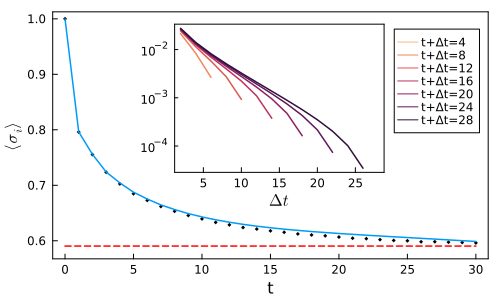

In [10]:
fn = "glauber_RFIM"
data = load("plot_data/"*fn*".jld2")
@unpack T, m, m_mc_eq, c = data

resize_factor = 1.0

pl = plot(ylims=(0.58,1), size=resize_factor.*(500,300), ylabel=L"\langle\sigma_i\rangle")
plot!(pl, 0:T, mean(m_mc_eq)[1:T+1], label="sample mean", c=:black, m=:diamond, ms=2, msc=:auto, st=:scatter)
plot!(pl, 0:T, m, xlabel="t", c=myblue,
    xticks=0:5:T, label="MPBP", legend=false)
plot!(pl, [0,T], [mean(m_mc_eq)[end], mean(m_mc_eq)[end]], c=:red, ls=:dash)

ci = map(x -> x > 1e-16 ? x : NaN, mean(c))
skip_even = true

plot!(pl, inset=(1, bbox(0.28, 0.05, 0.7, 0.6)), subplot=2)
pl_autocov = plot_autocovs!(pl[2], ci; us=4:4:T, skip_even, yaxis=:log10, legend=:outertopright)
plot!(pl[2], ylabel="")
pl

In [11]:
# savefig(pl, "plot_outputs/"*fn*".pdf");

## Glauber Large Deviations

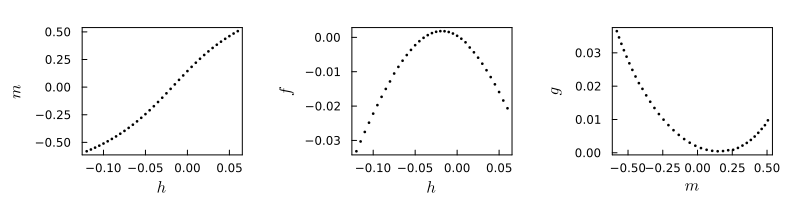

In [12]:
fn = "glauber_large_deviations"
data = load("plot_data/"*fn*".jld2")
@unpack T, J, β, m⁰, hs, magnetizs, ms, fs, gs = data

resize_factor = 0.7

# cg = cgrad(:matter, length(hs), categorical=true) .|> RGB
cg = fill(:black, length(hs))

pl1 = plot(hs, ms, label="", xlabel=L"h", ylabel=L"m", st=:scatter, c=cg, 
    size=resize_factor.*sz, ms=1.5)
pl2 = plot(hs, fs, label="", xlabel=L"h", ylabel=L"f", st=:scatter, c=cg, 
    size=resize_factor.*sz, ms=1.5)
pl3 = plot(ms, gs, label="", xlabel=L"m", ylabel=L"g", st=:scatter, c=cg, 
    size=resize_factor.*sz, ms=1.5)

plot(pl1, pl2, pl3, layout=(1,3), size=(800,200), margin=5Plots.mm)

In [13]:
# savefig(pl1, "plot_outputs/"*fn*"_a.pdf")
# savefig(pl2, "plot_outputs/"*fn*"_b.pdf")
# savefig(pl3, "plot_outputs/"*fn*"_c.pdf");

## SIS comparison SoftMargin

In [14]:
fn = "sis_softmargin"
data = load("plot_data/"*fn*".jld2")
@unpack T, N, p_bp, p_mc = data

pls = Vector{Plots.Plot}(undef, N)
ylims=(0,1)
xticks=0:5:T; yticks=0:0.5:1
for i in 1:N
    pls[i] = plot(0:T, p_bp[i]; ylims, xticks, yticks,
        titlefontsize=8, c=:orange, lw=2, title="i=$i", margin=0Plots.mm)
    scatter!(pls[i], 0:T, p_mc[i], m=:diamond, c=:black, ms=1.5)
end
pl_marg = plot(pls..., layout=(5,5), size=(700,700))
pl_corr = scatter(reduce(vcat, p_bp), reduce(vcat, p_mc), xlabel="MPBP", ylabel="MC", 
    ms=2, c=:black, legend=:outertopright)
r = cor(reduce(vcat, p_bp), value.(reduce(vcat, p_mc)))
println("Correlation r=$r")
plot!(pl_corr, identity, label="", size=(300,300));

Correlation r=0.999259417945226


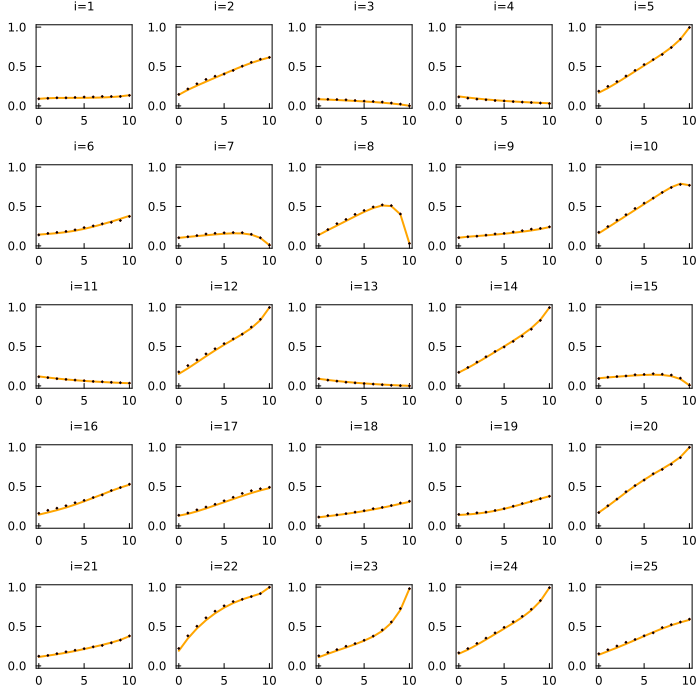

In [15]:
plot(pl_marg)

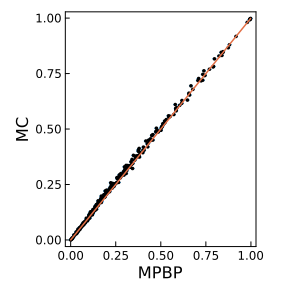

In [16]:
plot(pl_corr)

In [17]:
# savefig(pl_marg, "plot_outputs/"*fn*"_marg.pdf")
# savefig(pl_corr, "plot_outputs/"*fn*"_corr.pdf");

## SIS karate club network

In [18]:
fn = "sis_karate_club_network"
data = load("plot_data/"*fn*".jld2")
@unpack T, ΔT, Δt, p_bp, p_mc, p_dmp, p_cme, p_ibmf, c_bp,
    λ, ρ, svd_trunc = data

resize_factor = 0.8

pl = plot(xlabel="time", xticks=0:10:T, ylabel=L"P(x_{29}^t=I)", ylims=(-0.00,0.9), 
    legend=:bottomright, size=(600,400).*resize_factor)
plot!(pl, 0:ΔT:T, p_bp[30], label="MPBP")
plot!(pl, 0:Δt:T, p_dmp[30], ls=:dash, label="rDMP")
plot!(pl, 0:Δt:T, p_cme[30], ls=:dashdot, label="CME")
plot!(pl, 0:Δt:T, p_ibmf[30], ls=:dashdotdot, label="IBMF")
scatter!(pl, 0:Δt:T, value.(p_mc[30]), m=:diamond, ms=1, label="MC", c=:black)

# ylims = (0.85,0.88)
# plot!(pl, xticks=T-5:1:T, ylims=ylims, xlims=(T-5,T),
#     inset=(1, bbox(0.35, 0.2, 0.55, 0.45)), subplot=2)
# plot!(pl[2], 0:ΔT:T, p_bp[30], label="")
# plot!(pl[2], 0:Δt:T, p_dmp[30], ls=:dash, label="")
# plot!(pl[2], 0:Δt:T, p_cme[30], ls=:dashdot, label="")
# plot!(pl[2], 0:Δt:T, p_ibmf[30], ls=:dashdotdot, label="")
# scatter!(pl[2], 0:ΔT:T, value.(p_mc[30]), m=:diamond, ms=3, label="", c=:black)

pl_err = plot(xlabel="time", xticks=0:10:T, ylabel=L"L_1-error", size=(600,400).*resize_factor)
plot!(pl_err, 0:ΔT:T, mean(abs.(p_bp[i] .- value.(p_mc[i][1:Int(ΔT÷Δt):end])) for i in eachindex(p_bp)), label="MPBP")
plot!(pl_err, 0:Δt:T, mean(abs.(p_dmp[i] .- value.(p_mc[i])) for i in eachindex(p_dmp)),
        label="rDMP", ls=:dash)
plot!(pl_err, 0:Δt:T, mean(abs.(p_cme[i] .- value.(p_mc[i])) for i in eachindex(p_cme)), 
            label="CME", ls=:dashdot)
plot!(pl_err, 0:Δt:T, mean(abs.(p_ibmf[i] .- value.(p_mc[i])) for i in eachindex(p_ibmf)), 
                label="IBMF", ls=:dashdotdot);

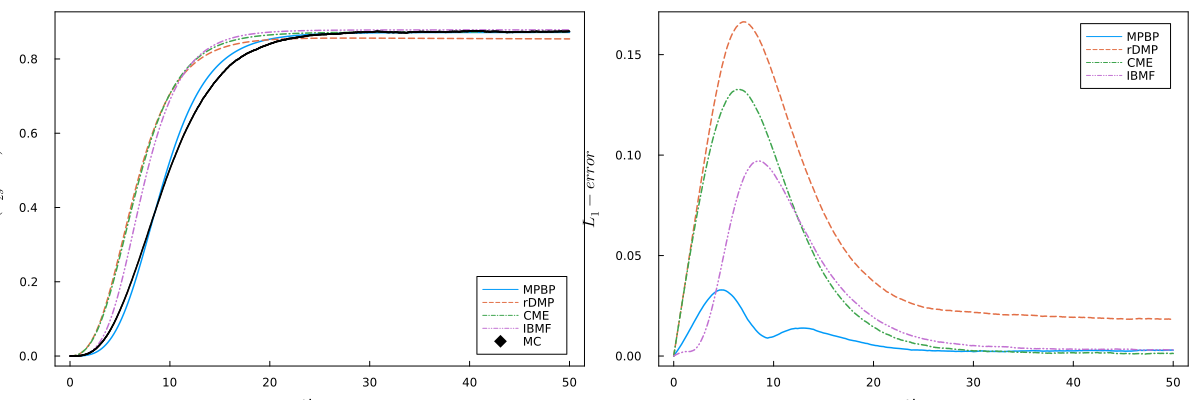

In [19]:
plot(pl, pl_err, size=(1200,400))

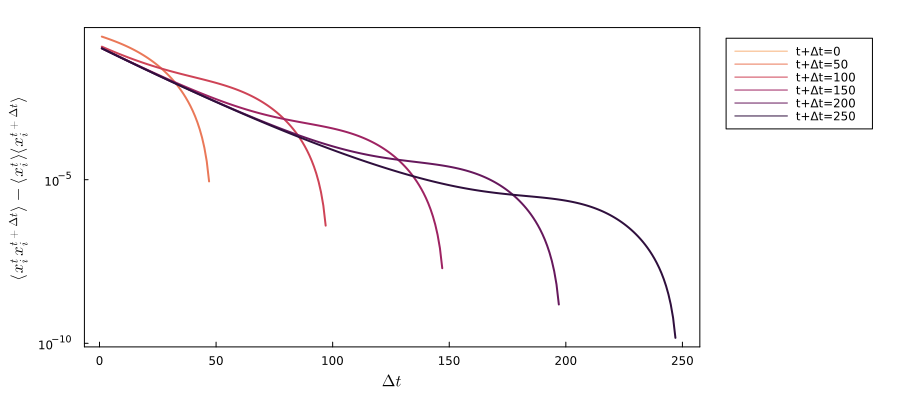

In [24]:
c_bp29 = map(x -> x > 1e-14 ? x : NaN, c_bp[30])
pl_autocov = plot_autocovs(c_bp29; ΔT, yaxis=(:log10), 
    size=(900,400), margin=5Plots.mm, lw=2)

In [21]:
# savefig(pl, "plot_outputs/"*fn*"_a.pdf")
# savefig(pl_err, "plot_outputs/"*fn*"_b.pdf")
# savefig(pl_autocov, "plot_outputs/"*fn*"_c.pdf");

## SIRS inference single instance

Observations at times: [10]


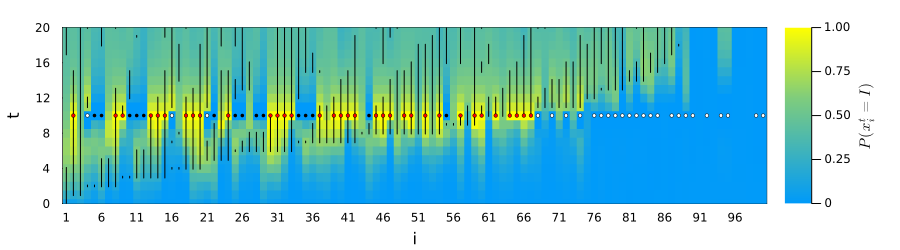

In [22]:
fn = "sis_inference_single_instance"
data = load("plot_data/"*fn*".jld2")
@unpack N, T, X, X_bp_sorted, true_infections_sorted, iperm, obs_times, c, λ, ρ, σ, γ, 
    observed, obs_fraction = data

resize_factor = 1.0

cg = cgrad([myblue, :yellow], 0.6)
pl = heatmap(1:N, 0:T, X_bp_sorted, c=cg, xlabel="i", ylabel="t", 
    colorbar_title=L"P(x_i^t=I)", yrange=(0,T), xticks=1:5:N)

for i in 1:N
    for a in true_infections_sorted[i]
        plot!(pl, [i,i], [a.start-0.1,a.stop+0.1], c=:black, label="", lw=1)
    end
end

cols = [:white, :red, :black]
for (i,t) in observed
    scatter!(pl, iperm[i:i], [t-1], ms=2, msc=:black, c=cols[X[i,t]], label="")
end

println("Observations at times: ", obs_times)
plot!(pl, yticks=0:(T÷5):T, widen=false, margin=5Plots.mm, size=(900,250).*resize_factor)

In [23]:
# savefig(pl, "plot_outputs/"*fn*".pdf");